In [1]:
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

In [2]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [5]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )

In [6]:
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [7]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


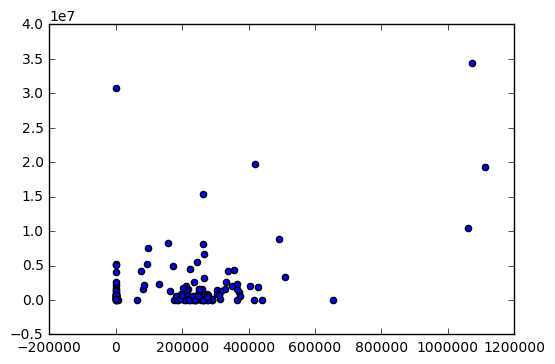

In [8]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()


In [9]:
finance_features

[array([ 365788.,       0.]),
 array([  267102.,  6680544.]),
 array([  170941.,  4890344.]),
 array([      0.,  651850.]),
 array([  243293.,  5538001.]),
 array([ 267093.,       0.]),
 array([      0.,  493489.]),
 array([  370448.,  1104054.]),
 array([       0.,  5210569.]),
 array([ 197091.,  880290.]),
 array([  130724.,  2282768.]),
 array([ 288589.,       0.]),
 array([ 248546.,  765313.]),
 array([ 257486.,       0.]),
 array([       0.,  2218275.]),
 array([      0.,  372205.]),
 array([ 288542.,       0.]),
 array([  251654.,  1056320.]),
 array([ 288558.,  185063.]),
 array([ 63744.,      0.]),
 array([       0.,  1030329.]),
 array([  357091.,  4346544.]),
 array([ 271442.,   81042.]),
 array([    0.,  3285.]),
 array([  304110.,  1441898.]),
 array([ 187922.,       0.]),
 array([  213625.,  1465734.]),
 array([  249201.,  1635238.]),
 array([     0.,  98718.]),
 array([ 231330.,       0.]),
 array([ 182245.,  601438.]),
 array([ 211788.,       0.]),
 array([      0.,  850

In [11]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(finance_features)
pred = kmeans.predict(finance_features)

In [13]:
type(pred)

numpy.ndarray

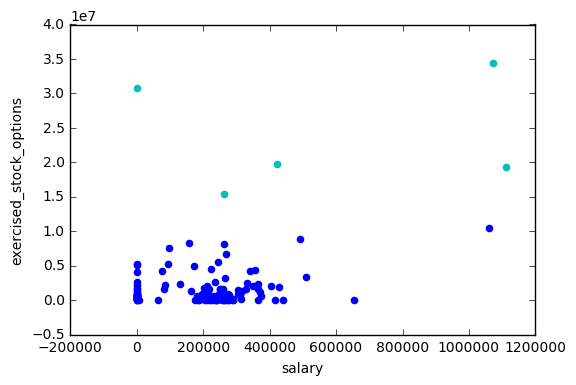

In [14]:
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters_1.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

### add a 3rd feature

In [15]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2,feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


In [24]:
print type(finance_features)
print len(finance_features)

<type 'list'>
139


In [29]:
# for f1, f2, _ in finance_features:
#     plt.scatter( f1, f2)
# plt.show()

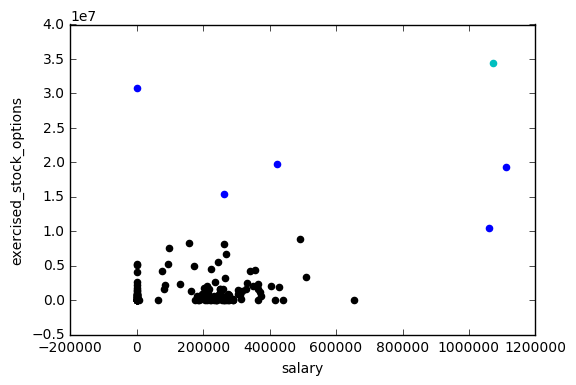

In [28]:
kmeans = KMeans(n_clusters=3).fit(finance_features)
pred = kmeans.predict(finance_features)

try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters_3.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"
    

### stock option range

In [30]:
finance_features

[array([  365788.,        0.,  1061827.]),
 array([  267102.,  6680544.,  5634343.]),
 array([  170941.,  4890344.,   211725.]),
 array([      0.,  651850.,       0.]),
 array([  243293.,  5538001.,   288682.]),
 array([ 267093.,       0.,  628522.]),
 array([       0.,   493489.,  1848227.]),
 array([  370448.,  1104054.,  4099771.]),
 array([       0.,  5210569.,  3131860.]),
 array([  197091.,   880290.,  1737629.]),
 array([  130724.,  2282768.,  3100224.]),
 array([  288589.,        0.,  1130461.]),
 array([  248546.,   765313.,  2014835.]),
 array([  257486.,        0.,  1545059.]),
 array([       0.,  2218275.,   966522.]),
 array([      0.,  372205.,       0.]),
 array([  288542.,        0.,  1490344.]),
 array([  251654.,  1056320.,  3202070.]),
 array([ 288558.,  185063.,  551174.]),
 array([  63744.,       0.,  762135.]),
 array([       0.,  1030329.,    87410.]),
 array([  357091.,  4346544.,  1798780.]),
 array([  271442.,    81042.,  3471141.]),
 array([      0.,    3285.

In [31]:
type(finance_features)

list

In [33]:
finance_features_np = numpy.asarray(finance_features)

In [34]:
type(finance_features_np)

numpy.ndarray

#### max

In [40]:
print finance_features_np.max(axis=0)
print finance_features_np.max(axis=0)[2]

[  1.11125800e+06   3.43483840e+07   1.03559793e+08]
103559793.0


#### min

In [41]:
print finance_features_np.min(axis=0)
print finance_features_np.min(axis=0)[2]

[ 0.  0.  0.]
0.0


### (NB: if you look at finance_features, there are some "NaN" values that have been cleaned away and replaced with zeroes--so while those might look like the minima, it's a bit deceptive because they're more like points for which we don't have information, and just have to put in a number. So for this question, go back to data_dict and look for the maximum and minimum numbers that show up there, ignoring all the "NaN" entries.)

In [42]:
data_dict

{'ALLEN PHILLIP K': {'bonus': 4175000,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 1729541,
  'expenses': 13868,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_this_person_to_poi': 65,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'poi': False,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'shared_receipt_with_poi': 1407,
  'to_messages': 2902,
  'total_payments': 4484442,
  'total_stock_value': 1729541},
 'BADUM JAMES P': {'bonus': 'NaN',
  'deferral_payments': 178980,
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 257817,
  'expenses': 3486,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 'NaN'

In [46]:
exercised_stock_options_max = 0
exercised_stock_options_min = 1e9

for key, value in data_dict.iteritems():
    if value['exercised_stock_options'] != "NaN":
        if value['exercised_stock_options'] > exercised_stock_options_max:
            exercised_stock_options_max =  value['exercised_stock_options']
        if value['exercised_stock_options'] < exercised_stock_options_min:
            exercised_stock_options_min = value['exercised_stock_options']
            
print "max :" + str(exercised_stock_options_max)
print "min :" + str(exercised_stock_options_min)

max :34348384
min :3285


In [47]:
salary_max = 0
salary_min = 1e9

for key, value in data_dict.iteritems():
    if value['salary'] != "NaN":
        if value['salary'] > salary_max:
            salary_max =  value['salary']
        if value['salary'] < salary_min:
            salary_min = value['salary']
            
print salary_max
print salary_min

1111258
477


```
The plot on the next slide shows the exact same clustering code that you just wrote, but in this example we applied feature scaling before performing the clustering.

We want you to compare the clustering with scaling (on the next slide) with the first clustering visualization you produced, when you used two features in your clustering algorithm.

Notice that now the range of the features has changed to [0.0, 1.0]. That's the only change we've made.

In the next lesson you’ll learn a lot more about what feature scaling means, but for now, just look at the effect on the clusters--which point(s) switch their associated cluster?
```

# feature rescaling

In [53]:
exercised_stock_options_max = float(exercised_stock_options_max)
exercised_stock_options_min = float(exercised_stock_options_min)
exercised_stock_options_rng = exercised_stock_options_max - exercised_stock_options_min

salary_max = float(salary_max)
salary_min = float(salary_min)
salary_rng = salary_max - salary_min

In [55]:
salary_v = 2e5
eso = 1e6

salary_v_scaled = (salary_v - salary_min) / salary_rng
eso_scaled = (eso - exercised_stock_options_min) / exercised_stock_options_rng

print salary_v_scaled
print eso_scaled

0.17962406631
0.0290205889347


```
What if we wanted to cluster based on “from_messages” (the number of email messages sent from a particular email account) and “salary”? Would feature scaling be unnecessary in this case, or critical?
```

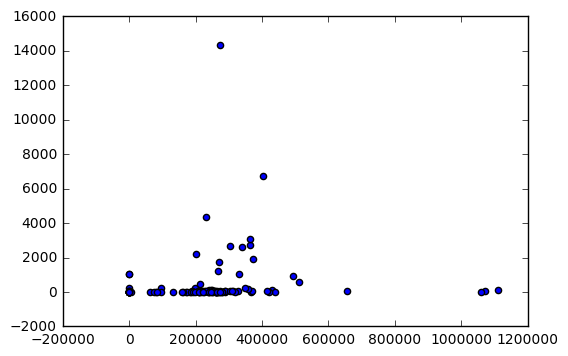

In [56]:
feature_1 = "salary"
feature_2 = "from_messages"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

